### Access time evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as md

%matplotlib inline

In [2]:
 def acces_time(data):
        
    N = len(data)
    dates = []
    usage = []

    for i in range(N):

        year = 2021
        month = 4
        day = data['day'][i]
        start = data['start'][i]
        (hour, minute) = start.split(':')

        d = datetime.datetime(year, month, day, int(hour), int(minute))

        delta = data['delta'][i]

        (h, m) = delta.split(':')
        h = int(h[-2:])
        m = int(m[:-1])

        use = h  + m/60.0

        dates.append(d)
        usage.append(use)
        
    return dates, usage

In [3]:
WCD = pd.read_csv('Access_time_WCD.dat',  sep='\s+', names = ['user', 'pts', 'IP', 'dayname', 'month', 'day', 'start', 'sep', 'stop', 'delta'])

In [4]:
datesWCD, usageWCD = acces_time(WCD)

dfWCD = pd.DataFrame({'Date':datesWCD, 'Usage':usageWCD})
dcWCD = dfWCD.sort('Date')

datenumsWCD=md.date2num(dcWCD['Date'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
Esc = pd.read_csv('Access_time_Esc.dat',  sep='\s+', names = ['user', 'pts', 'IP', 'dayname', 'month', 'day', 'start', 'sep', 'stop', 'delta'])

In [6]:
datesEsc, usageEsc= acces_time(Esc)

dfEsc = pd.DataFrame({'Date':datesEsc, 'Usage':usageEsc})
dcEsc = dfEsc.sort('Date')

datenumsEsc=md.date2num(dcEsc['Date'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [53]:
SiPM = pd.read_csv('Access_time_SiPM.dat',  sep='\s+', names = ['user', 'pts', 'IP', 'dayname', 'month', 'day', 'start', 'sep', 'stop', 'delta'])

In [54]:
datesSiPM, usageSiPM= acces_time(SiPM)

dfSiPM = pd.DataFrame({'Date':datesSiPM, 'Usage':usageSiPM})
dcSiPM = dfSiPM.sort('Date')

datenumsSiPM=md.date2num(dcSiPM['Date'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Text(0.5,0,'Date [mm-dd HH:MM]')

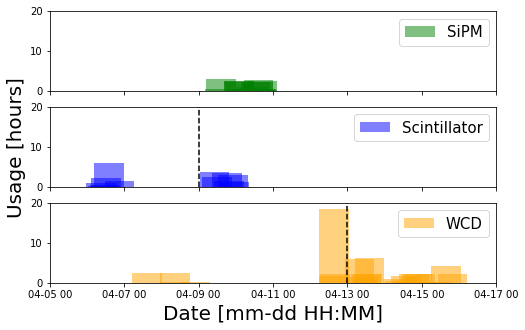

In [89]:
plt.figure(figsize = (8,5))
plt.subplot(3,1,1)
plt.bar(datenumsSiPM, dcSiPM['Usage'], color= 'green', alpha=0.5, label='SiPM')

ax=plt.gca()
xfmt = md.DateFormatter('%m-%d %H') # '%Y-%m-%d %H:%M:%S'
ax.xaxis.set_major_formatter(xfmt)
ax.set_xlim([datetime.date(2021, 4, 5), datetime.date(2021, 4, 17)])
ax.set_ylim([0,20])
plt.legend(fontsize=15)
plt.xticks(color='w')

plt.subplot(3,1,2)
plt.bar(datenumsEsc, dcEsc['Usage'], color= 'blue', alpha=0.5, label='Scintillator')
plt.axvline(datetime.datetime(2021,4,9,0,0,0), color='k', ls='--')
ax=plt.gca()
xfmt = md.DateFormatter('%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xlim([datetime.date(2021, 4, 5), datetime.date(2021, 4, 17)])
ax.set_ylim([0,20])
plt.legend(fontsize=15)
plt.ylabel("Usage [hours]", fontsize = 20)
plt.xticks(color='w')

plt.subplot(3,1,3)
plt.bar(datenumsWCD, dcWCD['Usage'], color= 'orange', alpha=0.5, label='WCD')
plt.axvline(datetime.datetime(2021,4,13,0,0,0), color='k', ls='--')
ax=plt.gca()
xfmt = md.DateFormatter('%m-%d %H') 
ax.xaxis.set_major_formatter(xfmt)
ax.set_xlim([datetime.date(2021, 4, 5), datetime.date(2021, 4, 17)])
ax.set_ylim([0,20])
plt.legend(fontsize=15)
plt.xlabel("Date [mm-dd HH:MM]", fontsize = 20)


# IP location

In [8]:
import pygeoip
from mpl_toolkits.basemap import Basemap

In [36]:
gi = pygeoip.GeoIP('GeoLiteCity.dat')

In [37]:
IP_data = pd.read_csv('IP_Access.dat', sep='\s+' , names = ['user', 'pts', 'IP', 'dayname', 'month', 'day', 'start', 'sep', 'stop', 'delta'])

In [38]:
M = len(IP_data)
city = []
lat = []
lon = []
country = []
use = []

for i in range(M):
    
    use.append(str(IP_data['delta'][i]))
    
    loc = gi.record_by_addr(IP_data['IP'][i])
    try:
        city.append(loc['city'])
        country.append(loc['country_name'])
        lat.append(loc['latitude'])
        lon.append(loc['longitude'])
    except:
        
        if IP_data['IP'][i]=='45.186.255.102':
            city.append('Lima')
            country.append('Peru')
            lat.append('-12.0433')
            lon.append('-77.0283')
            
        elif IP_data['IP'][i]=='10.1.28.86':
            city.append('Bucaramanga')
            country.append('Colombia')
            lat.append('7.1254')
            lon.append('-73.1198')

        elif IP_data['IP'][i]=='10.1.28.86' or IP_data['IP'][i]=='10.1.28.97':
            city.append('Bucaramanga')
            country.append('Colombia')
            lat.append('7.1254')
            lon.append('-73.1198')
        
        # print 'IP not found : ' + IP_data['IP'][i]

In [39]:
dloc = pd.DataFrame({'Country':country, 'City':city, 'Lat':lat, 'Lon':lon, 'Use':use})

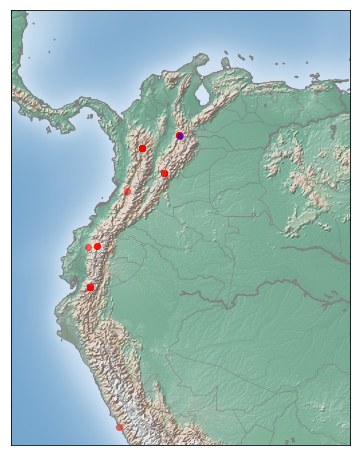

In [40]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=1, lon_0=-73, width=2.5E6, height=3.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(np.array(dloc['Lon']),np.array(dloc['Lat']), latlon=True, color='r', alpha=0.5) 
m.scatter(-73.071182,7.081993, latlon=True, color='b', alpha=0.5)

In [41]:
Lats = np.array(dloc.drop_duplicates(['Lat'])['Lat'])
Lons = np.array(dloc.drop_duplicates(['Lon'])['Lon'])

L = len(Lats)

access = np.zeros((L,3))

for k in range(L):
    
    access_time = 0
    
    for j in range(M):
        
        if  dloc['Lat'][j] == Lats[k]:

            delta = dloc['Use'][j]

            (h, m) = delta.split(':')
            h = int(h[-2:])
            m = int(m[:-1])

            access_time = access_time + h  + m/60.0
            
    access[k,0] = Lats[k]
    access[k,1] = Lons[k]
    access[k,2] = access_time
    
a = access[access[:, 2].argsort()]

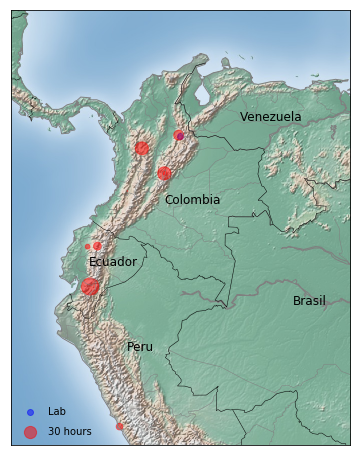

In [51]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', lat_0=1, lon_0=-73, width=2.5E6, height=3.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

plt.annotate(s='Colombia',xy=(m(-74.071182,2.581993)), fontsize=12)
plt.annotate(s='Venezuela',xy=(m(-69.071182,8.081993)), fontsize=12)
plt.annotate(s='Ecuador',xy=(m(-79.071182,-1.501993)), fontsize=12)
plt.annotate(s='Peru',xy=(m(-76.571182,-7.081993)), fontsize=12)
plt.annotate(s='Brasil',xy=(m(-65.571182,-4.081993)), fontsize=12)

m.scatter(a[:,1], a[:,0], latlon=True, s=a[:,2]*10, color='red', alpha=0.5, label=str(30) + ' hours')
m.scatter(-73.071182,7.081993, latlon=True, color='b', alpha=0.5, label='Lab')
m.drawcountries()


plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');